biology


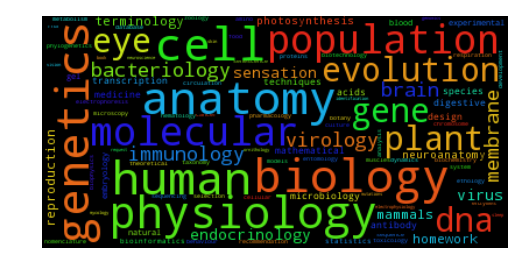

cooking


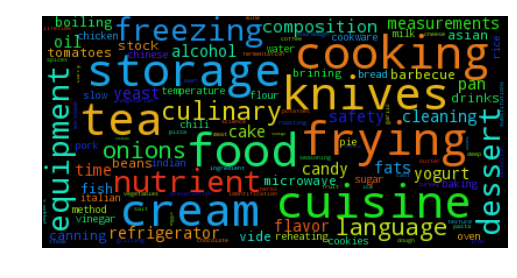

crypto


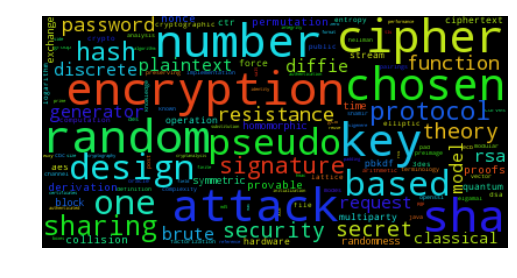

diy


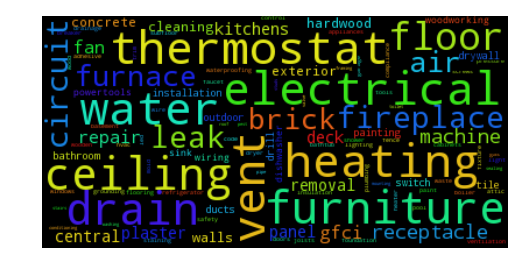

robotics


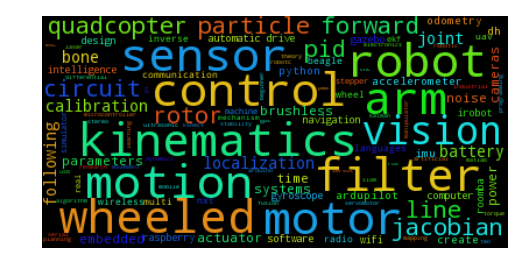

travel


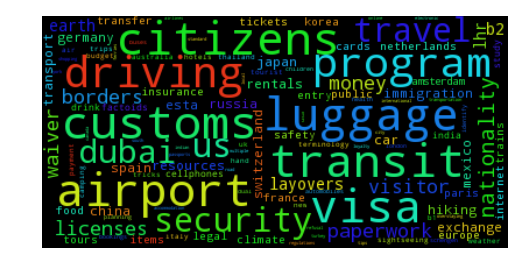

In [6]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jan 25 14:48:42 2017

@author: tpauley
"""

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
import numpy as np
from sklearn import datasets, linear_model, svm
import math
import bleach
import collections
from wordcloud import WordCloud
from nltk.corpus import stopwords
cachedStopWords = stopwords.words("english")
import matplotlib.pyplot as plt

def stop_words(textinput):
    text = textinput
    return ' '.join([word for word in text.split() if word not in cachedStopWords])

#train = pd.read_excel("C:/Users/tpauley/Documents/Python Scripts/Kaggle/Stack Exchange Questions/Data/cleaned_train.xlsx")

train = pd.DataFrame()
for filename in ['biology','cooking','crypto','diy','robotics','travel']:
    read = pd.read_csv("C:/Users/tpauley/Documents/Python Scripts/Kaggle/Stack Exchange Questions/Data/"+filename+".csv")
    read['category'] = filename

    train = pd.concat([train,read])

test = pd.read_csv("C:/Users/tpauley/Documents/Python Scripts/Kaggle/Stack Exchange Questions/Data/test.csv")
#train = train.sample(n=1000) 
#test = test.sample(n=1000) 
#strip content of HTML tags (COMMENT OUT WHEN DONE)  
for index, row in train.iterrows():

    text = row['content']
    text = stop_words(bleach.clean(text, tags=[], attributes={}, styles=[], strip=True))
    train.set_value(index,'content',text)

for index, row in test.iterrows():

    text = row['content']
    text = stop_words(bleach.clean(text, tags=[], attributes={}, styles=[], strip=True))
    test.set_value(index,'content',text)    
#save HTML stripped csv  (COMMENT OUT WHEN DONE)  
#train.to_csv("C:/Users/tpauley/Documents/Python Scripts/Kaggle/Stack Exchange Questions/Data/cleaned_train.csv", sep=',')
    

wordlist = pd.DataFrame()
for cat in ['biology','cooking','crypto','diy','robotics','travel']:
    subtrain = train[train['category']== cat]
    topwords = pd.DataFrame(pd.Series(' '.join(subtrain['content']).lower().split()).value_counts()[:100])
    topwords['category'] = cat
    topwords['word'] =  topwords.index.values
    topwords = topwords[topwords['word'].str.len() >2]
    wordlist = pd.concat([topwords,wordlist])

wordlist = wordlist.rename(columns={0: 'count'})
#print(wordlist)

taglist = pd.DataFrame()
for cat in ['biology','cooking','crypto','diy','robotics','travel']:
    subtrain = train[train['category']== cat]
    toptags = pd.DataFrame(pd.Series(' '.join(subtrain['tags']).lower().split()).value_counts()[:100])
    toptags['category'] = cat
    toptags['word'] =  toptags.index.values
    toptags = toptags[toptags['word'].str.len() >2]
    taglist = pd.concat([toptags,taglist])

taglist = taglist.rename(columns={0: 'count'})
    
for cat in ['biology','cooking','crypto','diy','robotics','travel']:
    subcat_taglist = taglist[taglist['category'] == cat]
    wordcloud_string = subcat_taglist['word'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=40).generate(wordcloud_string)

    plt.imshow(wordcloud)
    plt.axis('off')
    print(cat)
    plt.show()



#train['new_tags'] = '' 
#for index, row in train.iterrows():
#    text = row['content']
#    title = row['title']
#    #print(text)
#    new_tags = ''
#    for index1, row1 in taglist.iterrows():
#        if (row1['word'] in text or row1['word'] in title) and row['category'] == row1['category']:
#            new_tags = row1['word'] + ' ' + new_tags
#            train.set_value(index,'new_tags',new_tags)
#            if  len(new_tags) > 100:
#                break
#train[['id','new_tags']].to_csv("C:/Users/tpauley/Documents/Python Scripts/Kaggle/Stack Exchange Questions/Data/results.csv", sep=',')
#  



test['new_tags'] = '' 
for index, row in test.iterrows():
    text = row['content']
    title = row['title']
    #print(text)
    new_tags = ''
    for index1, row1 in taglist.iterrows():
        if (row1['word'] in text or row1['word'] in title) and row1['word'] not in row['new_tags']:
            new_tags = row1['word'] + ' ' + new_tags
            test.set_value(index,'new_tags',new_tags)
            if  len(new_tags) > 100:
                break
test[['id','new_tags']].to_csv("C:/Users/tpauley/Documents/Python Scripts/Kaggle/Stack Exchange Questions/Data/results.csv", sep=',')
  